In [52]:
import fiona
import geopandas as gpd
import pandas as pd

from utils.regions import Region

In [2]:
fiona.listlayers("assets/gadm_ru.gpkg")

['ADM_ADM_0', 'ADM_ADM_1', 'ADM_ADM_2', 'ADM_ADM_3']

In [3]:
regions = gpd.read_file("assets/gadm_ru.gpkg", layer="ADM_ADM_1")

/home/pavel/.venv/hse/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot: >

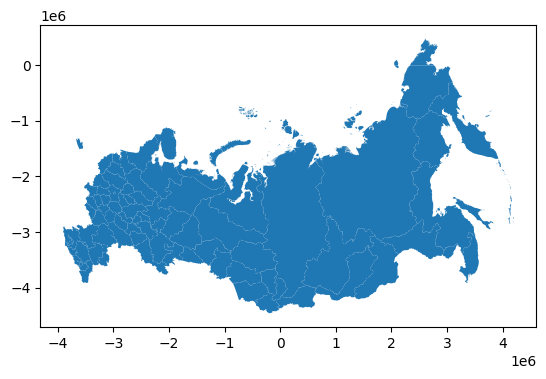

In [5]:
regions.to_crs("EPSG:3576").plot()

In [20]:
r = Regions()

In [58]:
regions["region"] = regions["NL_NAME_1"].apply(lambda x: r.get(x).name)

manual = {
    "Республика Чечено-Ингушская": "Чеченская республика",
    "Респу́блика Ингуше́тия": "Республика Ингушетия",
    "Камчатская край": "Камчатский край",
    "NA": "Москва",
    "Пермская край": "Пермский край",
    "Eврейская АОб": "Еврейская автономная область",
}
for search, replace in manual.items():
    regions.loc[regions["NL_NAME_1"] == search, "region"] = replace

In [6]:
data = pd.read_csv("rsmp/reestr_group_A/panel.csv")

In [30]:
data["agroup"] = data["activity_code_main"].apply(lambda x: x.split(".")[0])

In [67]:
data["agroup"].value_counts()

agroup
01    1519999
02     201227
03      85335
Name: count, dtype: int64

In [68]:
reg_agroup_counts = data.loc[data["year"] == 2021, ].groupby(["region", "agroup"]).size().reset_index().rename(columns={0: "count"})
reg_agroup_counts.head()

,region,agroup,count
0,Алтайский край,01,4371
1,Алтайский край,02,558
2,Алтайский край,03,101
3,Амурская область,01,1223
4,Амурская область,02,237


In [65]:
assert len(set(data["region"].unique()) & set(regions["region"].unique())) == 83

In [72]:
regions.merge(reg_agroup_counts)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,region,agroup,count
0,RUS.1_1,RUS,Russia,Adygey,Adygea|Adygeya|Adygheya|Republic,Республика Адыгея,Respublika,Republic,NA,RU.AD,NA,"MULTIPOLYGON (((40.38721 44.67212, 40.37504 44...",Республика Адыгея,01,1725
1,RUS.1_1,RUS,Russia,Adygey,Adygea|Adygeya|Adygheya|Republic,Республика Адыгея,Respublika,Republic,NA,RU.AD,NA,"MULTIPOLYGON (((40.38721 44.67212, 40.37504 44...",Республика Адыгея,02,146
2,RUS.1_1,RUS,Russia,Adygey,Adygea|Adygeya|Adygheya|Republic,Республика Адыгея,Respublika,Republic,NA,RU.AD,NA,"MULTIPOLYGON (((40.38721 44.67212, 40.37504 44...",Республика Адыгея,03,36
3,RUS.2_1,RUS,Russia,Altay,Altayskiy Kray,Алтайский край,Kray,Territory,NA,RU.AL,NA,"MULTIPOLYGON (((82.74661 50.94901, 82.73914 50...",Алтайский край,01,4371
4,RUS.2_1,RUS,Russia,Altay,Altayskiy Kray,Алтайский край,Kray,Territory,NA,RU.AL,NA,"MULTIPOLYGON (((82.74661 50.94901, 82.73914 50...",Алтайский край,02,558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,RUS.82_1,RUS,Russia,Yevrey,Den jødiske autonome oblasten|Ev,Eврейская АОб,Avtonomnaya Oblast,Autonomous Region,6701,RU.YV,NA,"MULTIPOLYGON (((134.27238 48.37264, 134.26170 ...",Еврейская автономная область,02,43
245,RUS.82_1,RUS,Russia,Yevrey,Den jødiske autonome oblasten|Ev,Eврейская АОб,Avtonomnaya Oblast,Autonomous Region,6701,RU.YV,NA,"MULTIPOLYGON (((134.27238 48.37264, 134.26170 ...",Еврейская автономная область,03,5
246,RUS.83_1,RUS,Russia,Zabaykal'ye,Zabaykalsky,Забайкальский край,Kray,Territory,NA,RU.ZB,NA,"MULTIPOLYGON (((109.24731 49.35029, 109.24727 ...",Забайкальский край,01,1228
247,RUS.83_1,RUS,Russia,Zabaykal'ye,Zabaykalsky,Забайкальский край,Kray,Territory,NA,RU.ZB,NA,"MULTIPOLYGON (((109.24731 49.35029, 109.24727 ...",Забайкальский край,02,360


/home/pavel/.venv/hse/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot: >

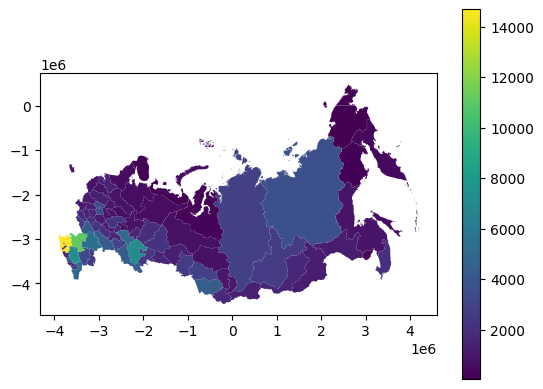

In [74]:
(regions
    .merge(reg_agroup_counts)
    .query("agroup == '01'")
    .to_crs("EPSG:3576")
    .plot(column="count", legend=True)
)

/home/pavel/.venv/hse/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot: >

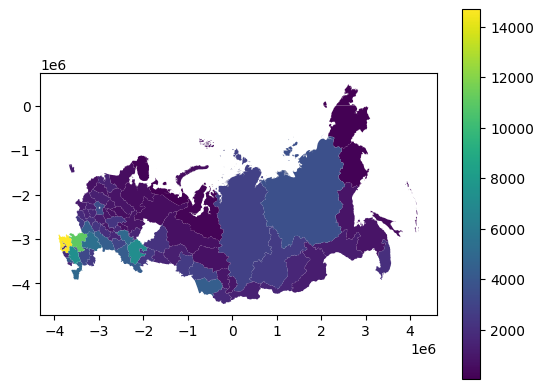

In [34]:
regions \
    .merge(
        data.loc[data["year"] == 2021, ].groupby(["region", "agroup"]).size().reset_index()
    ) \
    .to_crs("EPSG:3576") \
    .query("agroup == '01'") \
    .plot(column=0, legend=True)

/home/pavel/.venv/hse/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot: >

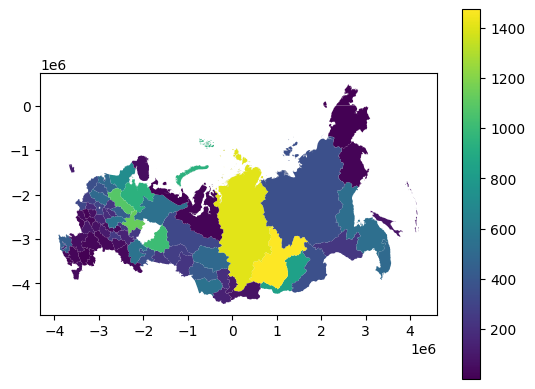

In [35]:
regions \
    .merge(
        data.loc[data["year"] == 2021, ].groupby(["region", "agroup"]).size().reset_index()
    ) \
    .to_crs("EPSG:3576") \
    .query("agroup == '02'") \
    .plot(column=0, legend=True)

/home/pavel/.venv/hse/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot: >

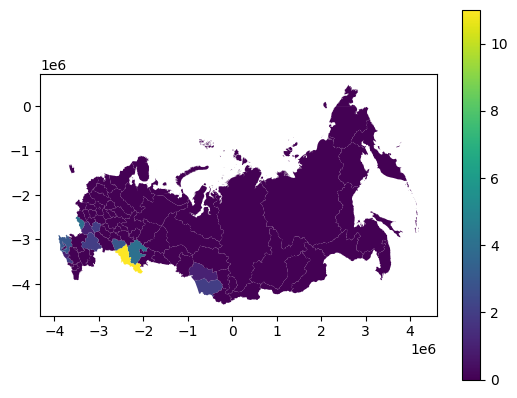

In [40]:
regions \
    .merge(
        data.loc[data["year"] == 2021, ].query("activity_code_main == '01.11.31'").groupby(["region"]).size().reset_index(),
        how="left"
    ) \
    .fillna(0) \
    .to_crs("EPSG:3576") \
    .plot(column=0, legend=True)

/home/pavel/.venv/hse/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot: >

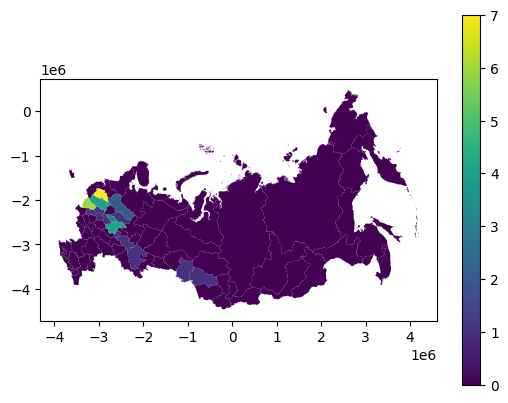

In [41]:
regions \
    .merge(
        data.loc[data["year"] == 2021, ].query("activity_code_main == '01.16.2'").groupby(["region"]).size().reset_index(),
        how="left"
    ) \
    .fillna(0) \
    .to_crs("EPSG:3576") \
    .plot(column=0, legend=True)

In [39]:
regions \
    .merge(
        data.loc[data["year"] == 2021, ].query("activity_code_main == '01.11.31'").groupby(["region"]).size().reset_index(),
        how="left"
    )

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,region,0
0,RUS.1_1,RUS,Russia,Adygey,Adygea|Adygeya|Adygheya|Republic,Республика Адыгея,Respublika,Republic,NA,RU.AD,NA,"MULTIPOLYGON (((40.38721 44.67212, 40.37504 44...",Республика Адыгея,NaN
1,RUS.2_1,RUS,Russia,Altay,Altayskiy Kray,Алтайский край,Kray,Territory,NA,RU.AL,NA,"MULTIPOLYGON (((82.74661 50.94901, 82.73914 50...",Алтайский край,2.0
2,RUS.3_1,RUS,Russia,Amur,Amurskaya Oblast,Амурская область,Oblast,Region,NA,RU.AM,NA,"MULTIPOLYGON (((130.50304 48.85646, 130.48853 ...",Амурская область,NaN
3,RUS.4_1,RUS,Russia,Arkhangel'sk,Arcangelo|Archangel|Archangelsk|,Архангельская область,Oblast,Region,NA,RU.AR,NA,"MULTIPOLYGON (((44.51251 60.93196, 44.38121 60...",Архангельская область,NaN
4,RUS.5_1,RUS,Russia,Astrakhan',Astrachan|Astrakhanskaya Oblast,Астраханская область,Oblast,Region,NA,RU.AS,NA,"MULTIPOLYGON (((47.87494 45.56921, 47.84983 45...",Астраханская область,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,RUS.79_1,RUS,Russia,Voronezh,Voronezhskaya Oblast,Воронежская область,Oblast,Region,NA,RU.VR,NA,"MULTIPOLYGON (((39.33907 49.96605, 39.37429 49...",Воронежская область,1.0
79,RUS.80_1,RUS,Russia,Yamal-Nenets,Yamalo-Nenetskiy A. Okrug,Ямало-Ненецкий АОк,Avtonomnyy Okrug,Autonomous Province,NA,RU.YN,NA,"MULTIPOLYGON (((83.86761 62.53408, 83.80219 62...",Ямало-Ненецкий автономный округ,NaN
80,RUS.81_1,RUS,Russia,Yaroslavl',Yaroslavskaya,Ярославская область,Oblast,Region,NA,RU.YS,NA,"MULTIPOLYGON (((38.35305 56.74351, 38.35250 56...",Ярославская область,NaN
81,RUS.82_1,RUS,Russia,Yevrey,Den jødiske autonome oblasten|Ev,Eврейская АОб,Avtonomnaya Oblast,Autonomous Region,6701,RU.YV,NA,"MULTIPOLYGON (((134.27238 48.37264, 134.26170 ...",NaN,NaN


/home/pavel/.venv/hse/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot: >

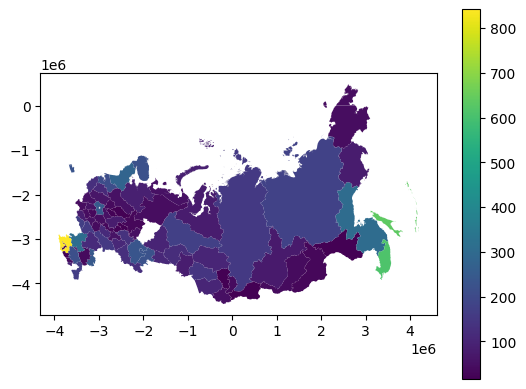

In [36]:
regions \
    .merge(
        data.loc[data["year"] == 2021, ].groupby(["region", "agroup"]).size().reset_index()
    ) \
    .to_crs("EPSG:3576") \
    .query("agroup == '03'") \
    .plot(column=0, legend=True)

In [10]:
points = data.loc[data["year"] == 2021, ].groupby(["lat", "lon"]).size().reset_index()

In [11]:
geopoints = gpd.GeoDataFrame(
    points, geometry=gpd.points_from_xy(points["lon"], points["lat"]), crs="EPSG:4326")

<AxesSubplot: >

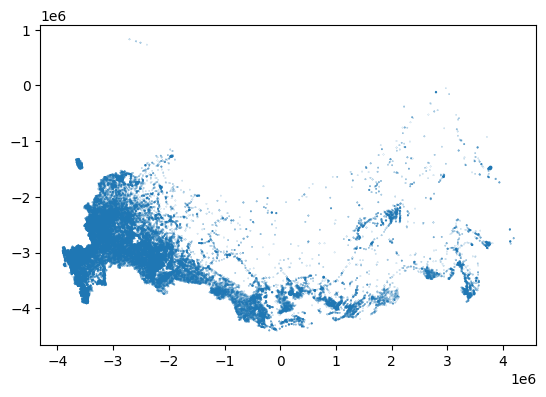

In [51]:
geopoints.to_crs("EPSG:3576").plot(markersize=geopoints[0] / 100)

In [16]:
geopoints.query("lon < 0")

,lat,lon,0,geometry
38338,64.428611,-16.998333,3,POINT (-16.99833 64.42861)
38468,65.503056,-16.993333,1,POINT (-16.99333 65.50306)
38475,65.585000,-16.991667,2,POINT (-16.99167 65.58500)
38527,66.321389,-16.999972,6,POINT (-16.99997 66.32139)
38589,67.426667,-16.991667,1,POINT (-16.99167 67.42667)


In [18]:
data.query("lon < 0")

,id,tin,reg_number,kind,category,first_name,last_name,patronymic,org_name,org_short_name,...,region,area,settlement,settlement_type,oktmo,lat,lon,address_raw,year,confidence
13526,230548,8704004711,1.128709e+12,1,1,NaN,NaN,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТРАН...","ООО ""ТРАНСЛОГИСТИК""",...,Чукотский автономный округ,Иультинский район,Эгвекинот,рп,7.771500e+10,66.321389,-16.999972,ЧУКОТСКИЙ / АВТОНОМНЫЙ ОКРУГ / ИУЛЬТИНСКИЙ / Р...,2016,1.0
17015,279355,870700278505,NaN,2,1,БОРИС,РЕНТОТ,МИХАЙЛОВИЧ,NaN,NaN,...,Чукотский автономный округ,Чукотский район,Лаврентия,с,7.763342e+10,65.585000,-16.991667,ЧУКОТСКИЙ / АВТОНОМНЫЙ ОКРУГ / ЧУКОТСКИЙ / РАЙ...,2016,1.0
19424,273459,870700016362,NaN,2,1,НИКОЛАЙ,ЭТТЫНЕ,НИКОЛАЕВИЧ,NaN,NaN,...,Чукотский автономный округ,Чукотский район,Лаврентия,с,7.763342e+10,65.585000,-16.991667,ЧУКОТСКИЙ / АВТОНОМНЫЙ ОКРУГ / ЧУКОТСКИЙ / РАЙ...,2016,1.0
31613,264717,870408391004,NaN,2,1,ВИКТОРИЯ,ПЕНЕТ,ВАЛЕНТИНОВНА,NaN,NaN,...,Чукотский автономный округ,Иультинский район,Нутэпэльмен,с,7.771500e+10,67.426667,-16.991667,ЧУКОТСКИЙ / АВТОНОМНЫЙ ОКРУГ / ИУЛЬТИНСКИЙ / Р...,2016,1.0
41058,172284,8705002499,NaN,1,1,NaN,NaN,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""РУБИН2""","ООО ""РУБИН2""",...,Чукотский автономный округ,Провиденский,Сиреники,с,7.771000e+10,64.407778,-16.991583,ЧУКОТСКИЙ / АВТОНОМНЫЙ ОКРУГ / ПРОВИДЕНСКИЙ / ...,2016,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757885,347108,870500465650,3.228700e+14,2,1,ГЕННАДИЙ,ГЫРГОЛЬНАУТ,ГЕННАДЬЕВИЧ,NaN,NaN,...,Чукотский автономный округ,Провиденский,Энмелен,с,7.771000e+10,65.006944,-16.991667,ЧУКОТСКИЙ / АВТОНОМНЫЙ ОКРУГ / ПРОВИДЕНСКИЙ / ...,2023,1.0
1762180,190634,253500015953,3.228700e+14,2,1,ВЯЧЕСЛАВ,ЛАЗАРЕНКО,ВИТАЛЬЕВИЧ,NaN,NaN,...,Чукотский автономный округ,Иультинский район,Эгвекинот,рп,7.771500e+10,66.321389,-16.999972,ЧУКОТСКИЙ / АВТОНОМНЫЙ ОКРУГ / ИУЛЬТИНСКИЙ / Р...,2023,1.0
1771605,381557,870700246197,3.228700e+14,2,1,НИНА,ИНАНКЕУЯСЬ,МИХАЙЛОВНА,NaN,NaN,...,Чукотский автономный округ,Чукотский район,Лорино,с,7.763342e+10,65.503056,-16.993333,ЧУКОТСКИЙ / АВТОНОМНЫЙ ОКРУГ / ЧУКОТСКИЙ / РАЙ...,2023,1.0
1787449,506660,870400165540,3.228700e+14,2,1,НИКОЛАЙ,ФЕДОТОВ,НИКОЛАЕВИЧ,NaN,NaN,...,Чукотский автономный округ,Иультинский район,Эгвекинот,рп,7.771500e+10,66.321389,-16.999972,ЧУКОТСКИЙ / АВТОНОМНЫЙ ОКРУГ / ИУЛЬТИНСКИЙ / Р...,2023,1.0


In [32]:
geopoints.drop(columns=["lat", "lon"]).rename(columns={0: "count"}).to_file("geopoints.gpkg", index=False)